# Question (a)

In [2]:
import numpy as np
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt


def generate_A_index(n):
    index = []
    for row in range(n):
        sub_list = [n + row - col for col in range(n)]
        index.append(sub_list)
    return index

def generate_A(n, j, k):
    A = np.zeros((n, n))
    
    a_vector = np.array([(k - i) / (k * (k + 1) / 2) for i in range(k)])
    a_vector_indices = [i for i in range(n+j, n+j-k,-1)]
    
    A_index = generate_A_index(n)

    for row in range(n):
        for col in range(n):

            target_index = A_index[row][col]

            vector_index = None
            for i in range(len(a_vector_indices)):
                if a_vector_indices[i] == target_index:
                    vector_index = i
                    break
            if vector_index is not None:
                A[row, col] = a_vector[vector_index]
    return A

In [3]:
def process_and_save_image(image_path, save_path, jl, jr, kl, kr):
    im = Image.open(image_path)
    img = np.array(im)
    img = img.astype(np.float64) / 255

    m, n = img.shape[:2]
    A_l = generate_A(n, jl, kl)
    A_r = generate_A(n, jr, kr)

    B = A_l @ img @ A_r

    plt.figure(1)
    plt.axis('off')
    plt.gray()
    plt.imshow(B)
    plt.imsave(save_path, B)
    print(f"image has been saved in {save_path}")

    return B

### 256 building

image has been saved in DDA3005 course project/blurred image/256_buildings_blurred1.png


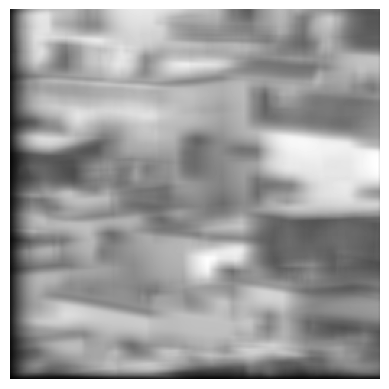

In [5]:
blurred_building1 = process_and_save_image('DDA3005 course project/test_images/256_buildings_original.png', 
                                     'DDA3005 course project/blurred image/256_buildings_blurred1.png', 
                                     jl=0, jr=1, kl=12, kr=24)

image has been saved in DDA3005 course project/blurred image/256_buildings_blurred2.png


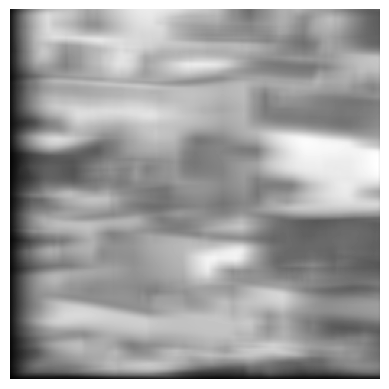

In [6]:
blurred_building2 = process_and_save_image('DDA3005 course project/test_images/256_buildings_original.png', 
                                     'DDA3005 course project/blurred image/256_buildings_blurred2.png', 
                                     jl=0, jr=1, kl=12, kr=36)

### 512 car

image has been saved in DDA3005 course project/blurred image/512_car_blurred1.png


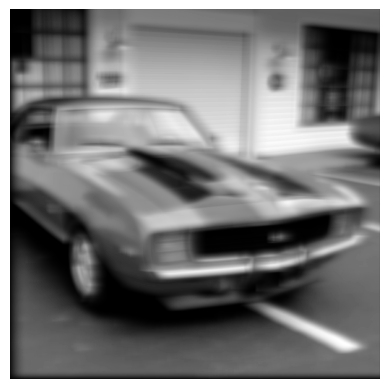

In [8]:
blurred_car1 = process_and_save_image('DDA3005 course project/test_images/512_car_original.png', 
                                     'DDA3005 course project/blurred image/512_car_blurred1.png', 
                                     jl=0, jr=1, kl=12, kr=24)

image has been saved in DDA3005 course project/blurred image/512_car_blurred2.png


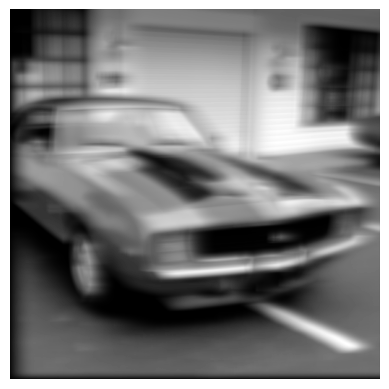

In [9]:
blurred_car2 = process_and_save_image('DDA3005 course project/test_images/512_car_original.png', 
                                     'DDA3005 course project/blurred image/512_car_blurred2.png', 
                                     jl=0, jr=1, kl=12, kr=36)

# Question (b)

In [11]:
import scipy.linalg as la
import time

def frobenius_norm(matrix):
    return np.sqrt(np.sum(matrix**2))

def relative_forward_error(A, A_hat):
    error = A - A_hat
    error_norm = frobenius_norm(error)
    A_norm = frobenius_norm(A)
    
    rfd = error_norm / A_norm
    print(f"relative forward error: {rfd}")
    # return rfd

def psnr(A, A_hat):
    A = A.astype(np.float64)
    A_hat = A_hat.astype(np.float64)
    
    mse = np.mean((A - A_hat) ** 2)
    if mse == 0:
        return float('inf')
    
    max_pixel_value = 255.0
    
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    print(f"PSNR: {psnr}")

    # return psnr

def plot_save_image(img, save_path):
    plt.figure(1)
    plt.axis('off')
    plt.gray()
    plt.imshow(img)
    plt.imsave(save_path, img)
    print(f"image has been saved in {save_path}")

def img2arr(img_address):
    im = Image.open(img_address) 
    img = np.array(im)
    img = img.astype(np.float64) / 255
    
    return img

## LU Factorization

In [13]:
def recover_image_LU(A_l, A_r, B):
    start = time.time()

    P_l, L_l, U_l = la.lu(A_l)
    P_r, L_r, U_r = la.lu(A_r)


    Y = la.solve(L_l, P_l.T @ B)
    
    Z = la.solve(U_l, Y)
    
    W = la.solve(U_r.T, Z.T)
    
    X_hat_T = la.solve(L_r.T, W)
    X_hat = X_hat_T.T
    
    end = time.time()
    
    print(f"required cpu time: {end - start}")
    return X_hat


### 256 building

required cpu time: 0.031188488006591797
PSNR: 73.99829196829745
relative forward error: 0.11573293814677561
image has been saved in DDA3005 course project/lu result/building1_lu.png


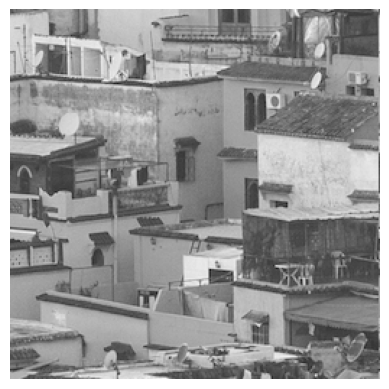

In [15]:
building = img2arr('DDA3005 course project/test_images/256_buildings_original.png')
m, n = blurred_building1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
building_hat1 = recover_image_LU(A_l, A_r, blurred_building1)
psnr(building, building_hat1)
relative_forward_error(building, building_hat1)
plot_save_image(building_hat1, 'DDA3005 course project/lu result/building1_lu.png')

required cpu time: 0.015620946884155273
PSNR: 73.99843438058373
relative forward error: 0.11573104062586628
image has been saved in DDA3005 course project/lu result/building2_lu.png


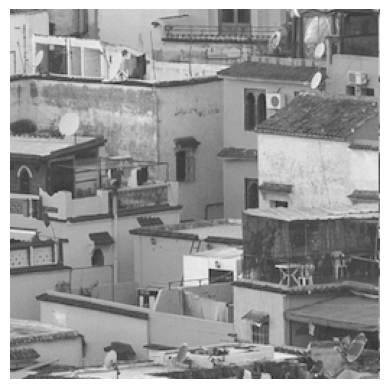

In [16]:
m, n = blurred_building2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
building_hat2 = recover_image_LU(A_l, A_r, blurred_building2)
psnr(building, building_hat2)
relative_forward_error(building, building_hat2)
plot_save_image(building_hat2, 'DDA3005 course project/lu result/building2_lu.png')

### 512 car

required cpu time: 0.03587961196899414
PSNR: -57.9021541421103
relative forward error: 402418.7962769451
image has been saved in DDA3005 course project/lu result/car1_lu.png


C:\Users\86183\AppData\Local\Temp\ipykernel_24916\1353096964.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=2.01944e-22): result may not be accurate.
  W = la.solve(U_r.T, Z.T)


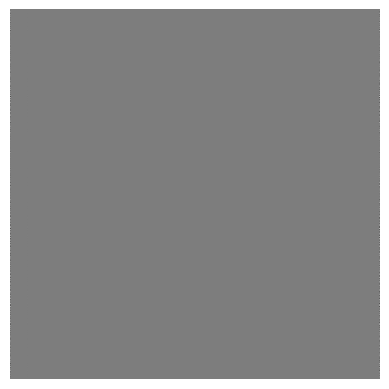

In [18]:
car = img2arr('DDA3005 course project/test_images/512_car_original.png')
m, n = blurred_car1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
car_hat1 = recover_image_LU(A_l, A_r, blurred_car1)
psnr(car, car_hat1)
relative_forward_error(car, car_hat1)
plot_save_image(car_hat1,'DDA3005 course project/lu result/car1_lu.png')

required cpu time: 0.03883814811706543
PSNR: 56.08833446243692
relative forward error: 0.8038107821463951
image has been saved in DDA3005 course project/lu result/car2_lu.png


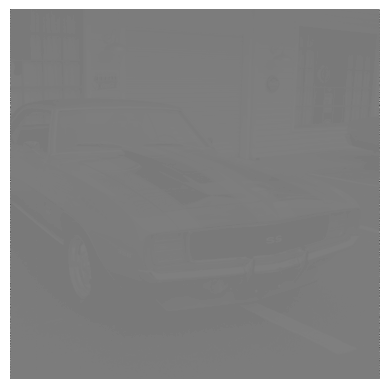

In [19]:
m, n = blurred_car2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
car_hat2 = recover_image_LU(A_l, A_r, blurred_car2)
psnr(car, car_hat2)
relative_forward_error(car, car_hat2)
plot_save_image(car_hat2,'DDA3005 course project/lu result/car2_lu.png')

## QR Factorization

In [21]:
def recover_image_QR(A_l, A_r, B):
    start = time.time()

    left_Q, left_R = np.linalg.qr(A_l)
    right_Q, right_R = np.linalg.qr(A_r)

    intermediate_result_1 = np.linalg.solve(left_R, left_Q.T @ B)
    intermediate_result_2 = np.linalg.solve(right_R, right_Q.T)
    X_hat = intermediate_result_1 @ intermediate_result_2

    end = time.time()

    print(f"required cpu time: {end - start}")
    return X_hat

### 256 building

required cpu time: 0.015552520751953125
PSNR: 122.36318830360707
relative forward error: 0.000441786216577958
image has been saved in DDA3005 course project/qr result/building1_qr.png


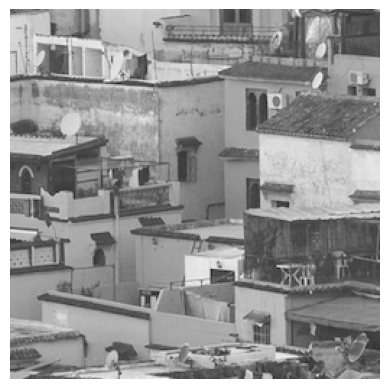

In [23]:
m, n = blurred_building1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
building_hat1 = recover_image_QR(A_l, A_r, blurred_building1)
psnr(building, building_hat1)
relative_forward_error(building, building_hat1)
plot_save_image(building_hat1, 'DDA3005 course project/qr result/building1_qr.png')

required cpu time: 0.0
PSNR: 178.54725657734411
relative forward error: 6.855020349825134e-07
image has been saved in DDA3005 course project/qr result/building2_qr.png


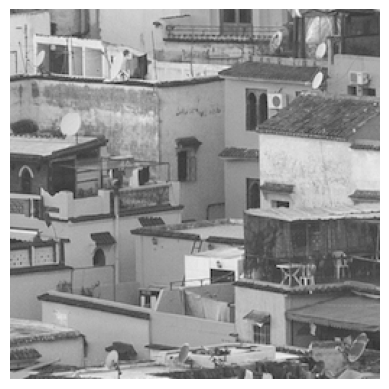

In [24]:
m, n = blurred_building2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
building_hat2 = recover_image_QR(A_l, A_r, blurred_building2)
psnr(building, building_hat2)
relative_forward_error(building, building_hat2)
plot_save_image(building_hat2, 'DDA3005 course project/qr result/building2_qr.png')

### 512 car

required cpu time: 0.029607057571411133
PSNR: 41.71314077897435
relative forward error: 4.206428503244814
image has been saved in DDA3005 course project/qr result/car1_qr.png


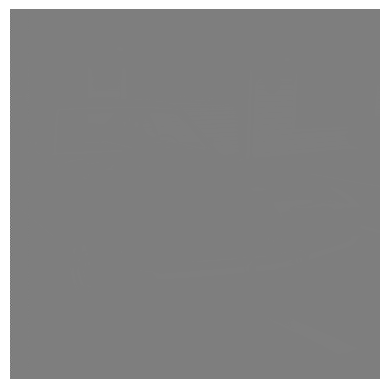

In [26]:
m, n = blurred_car1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
car_hat1 = recover_image_QR(A_l, A_r, blurred_car1)
psnr(car, car_hat1)
relative_forward_error(car, car_hat1)
plot_save_image(car_hat1, 'DDA3005 course project/qr result/car1_qr.png')

required cpu time: 0.04688835144042969
PSNR: 57.1405448170874
relative forward error: 0.7121038104844244
image has been saved in DDA3005 course project/qr result/car2_qr.png


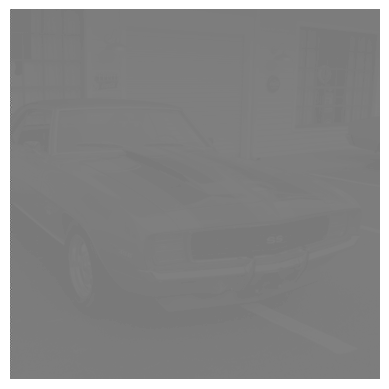

In [27]:
m, n = blurred_car2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
car_hat2 = recover_image_QR(A_l, A_r, blurred_car2)
psnr(car, car_hat2)
relative_forward_error(car, car_hat2)
plot_save_image(car_hat2, 'DDA3005 course project/qr result/car2_qr.png')

# Question (c) (without pivoting)

In [29]:
# Householder transformation by hand

# without pivoting
def householder_qr(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for j in range(n):
        # Compute Householder vector
        x = R[j:, j].reshape(-1, 1)
        e1 = np.zeros_like(x)
        e1[0, 0] = np.linalg.norm(x)
        v = x + np.sign(x[0, 0]) * e1
        v /= np.linalg.norm(v)

        # Apply Householder transformation to R
        R[j:, j:] -= 2 * np.dot(v, np.dot(v.T, R[j:, j:]))

        # Apply Householder transformation to Q
        Hj = np.eye(m - j) - 2 * np.dot(v, v.T)
        Qj = np.eye(m)
        Qj[j:, j:] = Hj
        Q = np.dot(Q, Qj)

    return Q, R

In [30]:
def recover_image_QR_householder(A_l, A_r, B):
    start = time.time()

    left_Q, left_R = householder_qr(A_l)
    right_Q, right_R = householder_qr(A_r)

    intermediate_result_1 = np.linalg.solve(left_R, left_Q.T @ B)
    intermediate_result_2 = np.linalg.solve(right_R, right_Q.T)
    X_hat = intermediate_result_1 @ intermediate_result_2

    end = time.time()
    print(f"required cpu time: {end - start}")
    return X_hat


### 256 building

required cpu time: 0.18022632598876953
PSNR: 122.34532789239337
relative forward error: 0.00044269557667984445
image has been saved in DDA3005 course project/self qr result/building1_hs.png


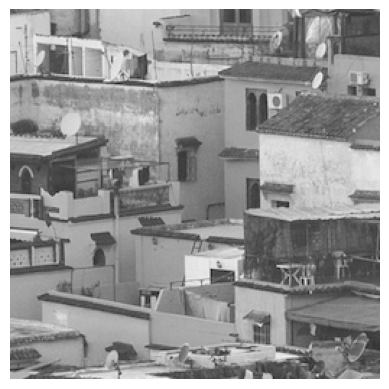

In [32]:
m, n = blurred_building1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
building_hat1 = recover_image_QR_householder(A_l, A_r, blurred_building1)
psnr(building, building_hat1)
re_fwd_err = relative_forward_error(building, building_hat1)
plot_save_image(building_hat1, 'DDA3005 course project/self qr result/building1_hs.png')

required cpu time: 0.19000649452209473
PSNR: 178.55638047126976
relative forward error: 6.847823431210509e-07
image has been saved in DDA3005 course project/self qr result/building2_hs.png


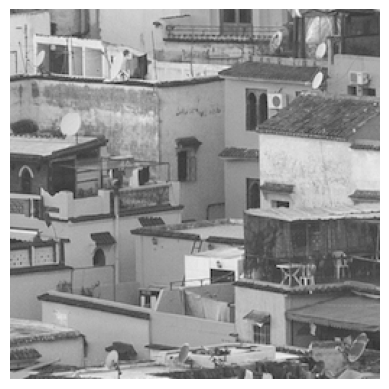

In [33]:
m, n = blurred_building2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
building_hat2 = recover_image_QR_householder(A_l, A_r, blurred_building2)
psnr(building, building_hat2)
re_fwd_err = relative_forward_error(building, building_hat2)
plot_save_image(building_hat2, 'DDA3005 course project/self qr result/building2_hs.png')

### 512 car

required cpu time: 3.343735456466675
PSNR: -561.2437390438818
relative forward error: 5.912314157720052e+30
image has been saved in DDA3005 course project/self qr result/car1_hs.png


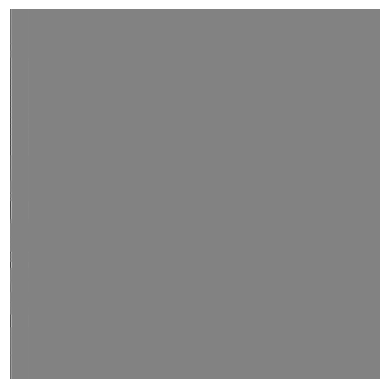

In [47]:
m, n = blurred_car1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
car_hat1 = recover_image_QR_householder(A_l, A_r, blurred_car1)
psnr(car, car_hat1)
re_fwd_err = relative_forward_error(car, car_hat1)
plot_save_image(car_hat1, 'DDA3005 course project/self qr result/car1_hs.png')

required cpu time: 3.557420253753662
PSNR: 44.48627199863812
relative forward error: 3.0567290941143663
image has been saved in DDA3005 course project/self qr result/car2_hs.png


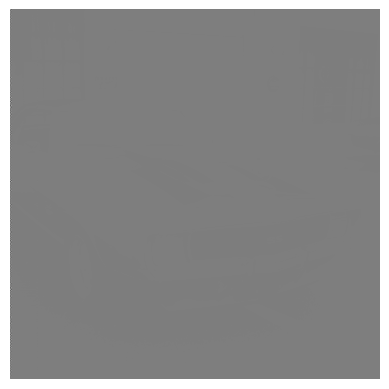

In [51]:
m, n = blurred_car2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
car_hat2 = recover_image_QR_householder(A_l, A_r, blurred_car2)
psnr(car, car_hat2)
re_fwd_err = relative_forward_error(car, car_hat2)
plot_save_image(car_hat2, 'DDA3005 course project/self qr result/car2_hs.png')

# Question (e)

In [55]:
def find_X_hat_least_squares(A_l, A_r, B):
    start = time.time()

    # Calculate the pseudoinverse of A_r
    A_r_pinv = np.linalg.pinv(A_r)

    # Compute A_l @ X = B @ A_r^T
    # We will compute the right-hand side first
    temp_matrix = np.dot(B, A_r_pinv)

    # Solve for X
    # We will solve A_l @ X = temp_matrix
    # X = A_l^pinv @ temp_matrix
    A_l_pinv = np.linalg.pinv(A_l)
    
    # Calculate the least squares solution
    X_hat = np.dot(A_l_pinv, temp_matrix)

    end = time.time()

    print(f"required cpu time: {end - start}")
    return X_hat

### 256 building

required cpu time: 0.012223958969116211
PSNR: 124.05828581514265
relative forward error: 0.0003634605558961067
image has been saved in DDA3005 course project/least square result/building1_ls.png


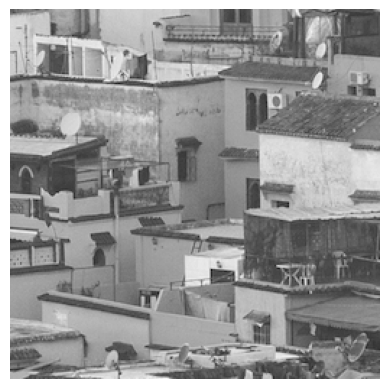

In [58]:
m, n = blurred_building1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
building_hat1 = find_X_hat_least_squares(A_l, A_r, blurred_building1)
psnr(building, building_hat1)
re_fwd_err = relative_forward_error(building, building_hat1)
plot_save_image(building_hat1, 'DDA3005 course project/least square result/building1_ls.png')

required cpu time: 0.008082151412963867
PSNR: 180.0927291542298
relative forward error: 5.737664097000062e-07
image has been saved in DDA3005 course project/least square result/building2_ls.png


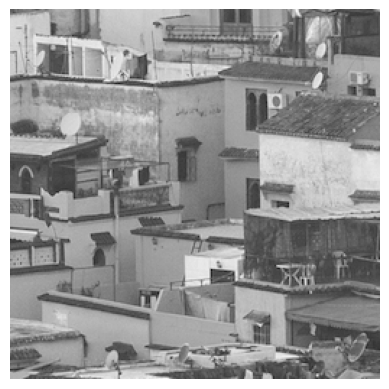

In [60]:
m, n = blurred_building2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
building_hat2 = find_X_hat_least_squares(A_l, A_r, blurred_building2)
psnr(building, building_hat2)
re_fwd_err = relative_forward_error(building, building_hat2)
plot_save_image(building_hat2, 'DDA3005 course project/least square result/building2_ls.png')

### 512 car

required cpu time: 0.04946088790893555
PSNR: 103.28405080371033
relative forward error: 0.003510492183483896
image has been saved in DDA3005 course project/least square result/car1_ls.png


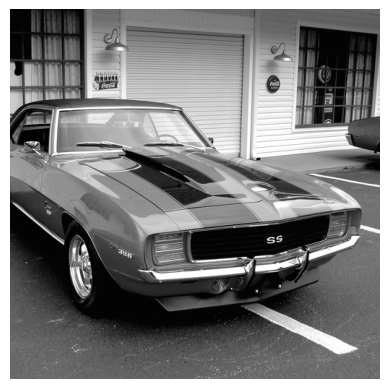

In [65]:
m, n = blurred_car1.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 24)
car_hat1 = find_X_hat_least_squares(A_l, A_r, blurred_car1)
psnr(car, car_hat1)
re_fwd_err = relative_forward_error(car, car_hat1)
plot_save_image(car_hat1, 'DDA3005 course project/least square result/car1_ls.png')

required cpu time: 0.06250286102294922
PSNR: 103.97840217956525
relative forward error: 0.0032407866530801094
image has been saved in DDA3005 course project/least square result/car2_ls.png


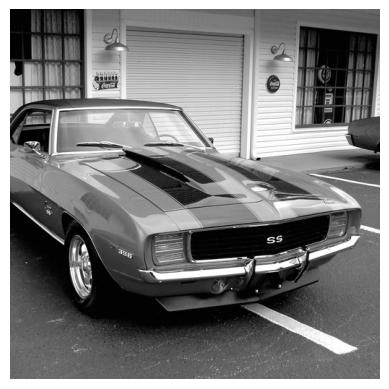

In [67]:
m, n = blurred_car2.shape
A_l = generate_A(n, 0, 12)
A_r = generate_A(n, 1, 36)
car_hat2 = find_X_hat_least_squares(A_l, A_r, blurred_car2)
psnr(car, car_hat2)
re_fwd_err = relative_forward_error(car, car_hat2)
plot_save_image(car_hat2, 'DDA3005 course project/least square result/car2_ls.png')